<a href="https://colab.research.google.com/github/longminh123/Nhapmonhocsau/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def load_data(filename):
    return pd.read_csv(filename)
filename='titanic_disaster.csv'
df=load_data(filename)

In [3]:
#câu 1
print(df.head(10))

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S
5            6         0       3  ...   8.4583   NaN         Q
6            7         0       1  ...  51.8625   E46         S
7            8         0       3  ...  21.0750   NaN         S
8            9         1       3  ...  11.1333   NaN         S
9           10         1       2  ...  30.0708   NaN         C

[10 rows x 12 columns]


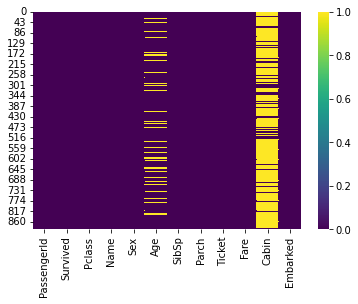

None
PassengerId    177
Survived       177
Pclass         177
Name           177
Sex            177
Age              0
SibSp          177
Parch          177
Ticket         177
Fare           177
Cabin           19
Embarked       177
dtype: int64
PassengerId    687
Survived       687
Pclass         687
Name           687
Sex            687
Age            529
SibSp          687
Parch          687
Ticket         687
Fare           687
Cabin            0
Embarked       687
dtype: int64
PassengerId    2
Survived       2
Pclass         2
Name           2
Sex            2
Age            2
SibSp          2
Parch          2
Ticket         2
Fare           2
Cabin          2
Embarked       0
dtype: int64


In [4]:
#câu2
sns.heatmap(df.isna(),cmap='viridis')
print(plt.show())
df_thieu_age=df[df['Age'].isna()]
print(df_thieu_age.count())
df_thieu_carbin=df[df['Cabin'].isna()]
print(df_thieu_carbin.count())
df_thieu_Embarked=df[df['Embarked'].isna()]
print(df_thieu_Embarked.count())

In [5]:
#câu 3
df[['firstname','secondname']]=df['Name'].str.split(',',expand=True)
df=df.drop('Name',axis=1)

In [13]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstname,secondname,Agegroup,familySize,Alone
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,2,0.0
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,2,0.0
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,1,0.0
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,2,0.0
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,1,0.0


In [15]:
#câu 4
Sex = df['Sex']
for i in range(len(Sex)):
  if  Sex[i] == 'male':
    df.Sex[i] = 'M'
  if  Sex[i] == 'female':
    df.Sex[i] = 'F'
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstname,secondname,Agegroup,familySize,Alone
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,2,0.0
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,2,0.0
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,1,0.0
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,2,0.0
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,1,0.0


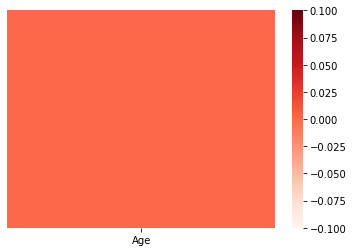

In [18]:
#Trực quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map.
sns.heatmap(df[['Age']].isna(), cmap = 'Reds', yticklabels= False)

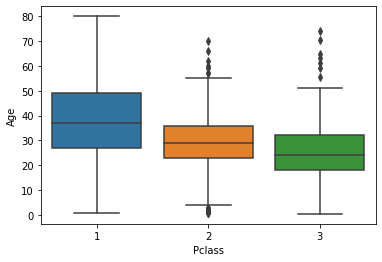

None


In [7]:
#câu5
sns.boxplot(y='Age',x='Pclass',data=df)
print(plt.show())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

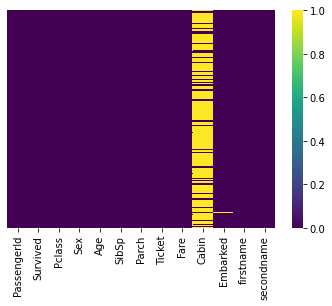

None


In [8]:
# thay dữ liệu age bị thiếu
df['Age'][df['Pclass']==1]=df['Age'][df['Pclass']==1].fillna(df['Age'][df['Pclass']==1].mean())
df['Age'][df['Pclass']==2]=df['Age'][df['Pclass']==2].fillna(df['Age'][df['Pclass']==2].mean())
df['Age'][df['Pclass']==3]=df['Age'][df['Pclass']==3].fillna(df['Age'][df['Pclass']==3].mean())

sns.heatmap(df.isna(),yticklabels=False,cbar=True,cmap='viridis')
print(plt.show())

In [19]:
#câu 6
for i in df['Age']:
  df.loc[(df['Age'] <=  12), 'Agegroup'] ='Kid'
  df.loc[(df['Age'] > 12) & (df['Age'] <= 18), 'Agegroup'] ='Teen'
  df.loc[(df['Age'] > 18) & (df['Age'] <= 60), 'Agegroup'] ='Adult'
  df.loc[(df['Age'] > 60), 'Agegroup'] ='Older'
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstname,secondname,Agegroup,familySize,Alone
0,1,0,3,M,22.00000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,2,0.0
1,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,2,0.0
2,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,1,0.0
3,4,1,1,F,35.00000,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,2,0.0
4,5,0,3,M,35.00000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,1,0.0
5,6,0,3,M,25.14062,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Adult,1,0.0
6,7,0,1,M,54.00000,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult,1,0.0
7,8,0,3,M,2.00000,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid,5,0.0
8,9,1,3,F,27.00000,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult,3,0.0
9,10,1,2,F,14.00000,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen,2,0.0


In [21]:
#câu 8
df['familySize']= df['SibSp'] +df['Parch'] +1

In [22]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstname,secondname,Agegroup,familySize,Alone
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,2,0.0
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,2,0.0
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,1,0.0
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,2,0.0
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,1,0.0


In [23]:
#câu 9
for i in df['familySize']:
  df.loc[(df['familySize'] ==  0), 'Alone'] = 1
  df.loc[(df['familySize'] !=  0), 'Alone'] = 0
df.Alone

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    0.0
890    0.0
Name: Alone, Length: 891, dtype: float64

In [24]:
#cau 10
df['typeCabin']= None
Cabin= df.Cabin
for i in range(len(Cabin)):
  if pd.isna(df.Cabin[i]) == True:
    df['typeCabin'][i]= '―Unknown'
  else:
    df['typeCabin'][i]= df.Cabin[i][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstname,secondname,Agegroup,familySize,Alone,typeCabin
0,1,0,3,M,22.00000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,2,0.0,―Unknown
1,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,2,0.0,C
2,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,1,0.0,―Unknown
3,4,1,1,F,35.00000,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,2,0.0,C
4,5,0,3,M,35.00000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,1,0.0,―Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,M,27.00000,0,0,211536,13.0000,NaN,S,Montvila,Rev. Juozas,Adult,1,0.0,―Unknown
887,888,1,1,F,19.00000,0,0,112053,30.0000,B42,S,Graham,Miss. Margaret Edith,Adult,1,0.0,B
888,889,0,3,F,25.14062,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie""",Adult,4,0.0,―Unknown
889,890,1,1,M,26.00000,0,0,111369,30.0000,C148,C,Behr,Mr. Karl Howell,Adult,1,0.0,C


In [ ]:
#Cau 11

In [26]:
Sur_Sex= df.groupby(['Survived', 'Sex'])[['Survived']].count()
Sur_Sex

Survived
Survived Sex          
0        F          81
         M         468
1        F         233
         M         109

In [28]:
unstackSur_Sex = Sur_Sex.unstack()
unstackSur_Sex

Survived     
Sex             F    M
Survived              
0              81  468
1             233  109

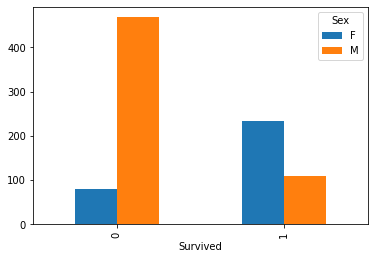

In [29]:
# Trực quan thông tin tương quan tỉ lệ 
#sống sót và thiệt mạng (Survived) trên từng nhóm giới tính (Sex).
unstackSur_Sex['Survived'].plot.bar()

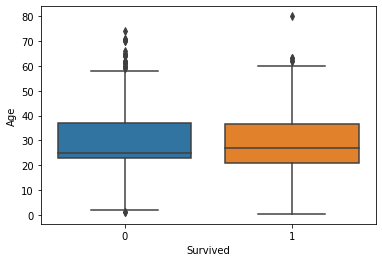

In [30]:
sns.boxplot(y='Age', x='Survived', data = df)

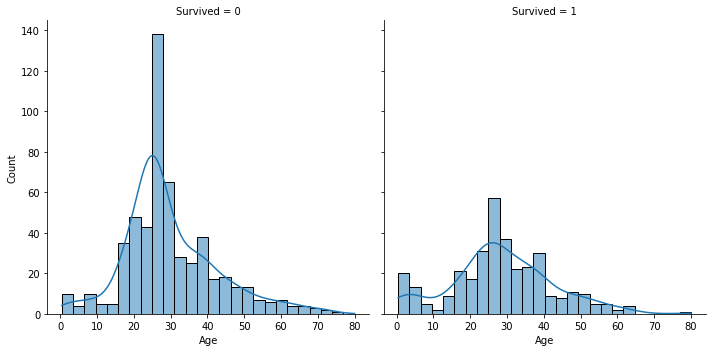

In [31]:
sns.displot(df, x="Age", col="Survived", kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


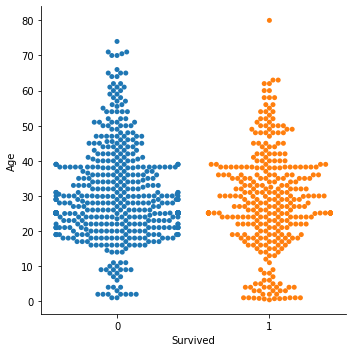

In [32]:
sns.catplot(x="Survived", y="Age", kind="swarm",data=df)

In [33]:
#câu 12
Sur_Pclass= df.groupby(['Survived', 'Pclass'])[['Survived']].count()
Sur_Pclass

Survived
Survived Pclass          
0        1             80
         2             97
         3            372
1        1            136
         2             87
         3            119

In [34]:
unstackSur_Pclass = Sur_Pclass.unstack()
unstackSur_Pclass

Survived         
Pclass          1   2    3
Survived                  
0              80  97  372
1             136  87  119

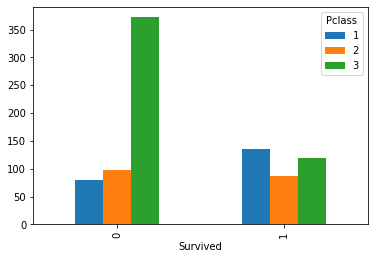

In [35]:
unstackSur_Pclass['Survived'].plot.bar()

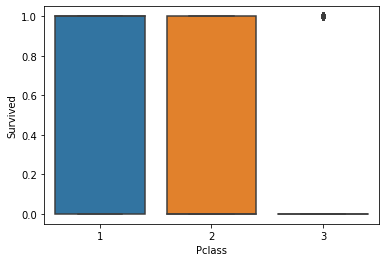

In [36]:
sns.boxplot(y='Survived', x='Pclass', data = df)

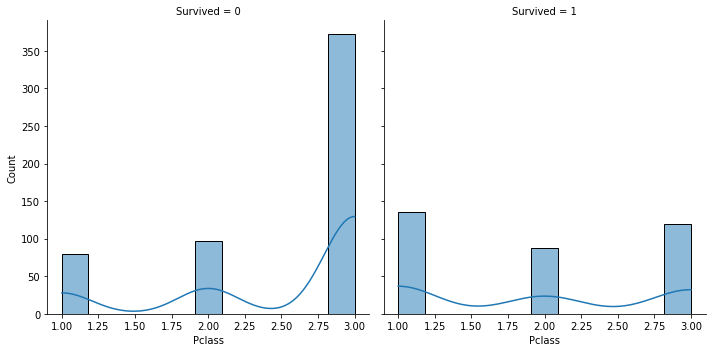

In [37]:
sns.displot(df, x="Pclass", col="Survived", kde=True)

In [ ]:
#Cau 13

In [38]:
Sur_Sex_Agegroup= df.groupby(['Survived', 'Sex','Agegroup'])[['Survived']].count()
Sur_Sex_Agegroup

Survived
Survived Sex Agegroup          
0        F   Adult           59
             Kid             13
             Teen             9
         M   Adult          404
             Kid             16
             Older           17
             Teen            31
1        F   Adult          184
             Kid             19
             Older            3
             Teen            27
         M   Adult           83
             Kid             21
             Older            2
             Teen             3

In [39]:
unstackSur_Sex_Agegroup = Sur_Sex_Agegroup.unstack()
unstackSur_Sex_Agegroup

Survived                  
Agegroup        Adult   Kid Older  Teen
Survived Sex                           
0        F       59.0  13.0   NaN   9.0
         M      404.0  16.0  17.0  31.0
1        F      184.0  19.0   3.0  27.0
         M       83.0  21.0   2.0   3.0

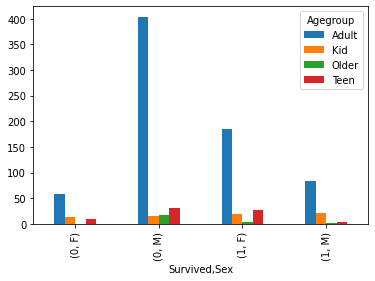

In [40]:
unstackSur_Sex_Agegroup['Survived'].plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


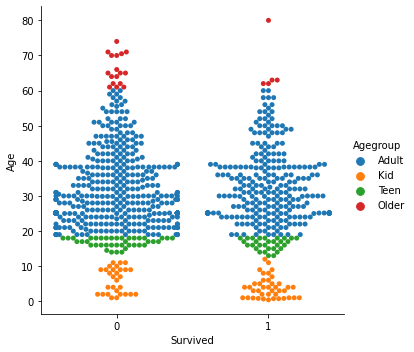

In [41]:
sns.catplot(x="Survived", y="Age", hue='Agegroup', kind="swarm",data=df)

In [ ]:
#cau14

In [42]:
Sur_familySize= df.groupby(['Survived', 'familySize'])[['Survived']].count()
unstackSur_familySize = Sur_familySize.unstack()
unstackSur_familySize

Survived                                             
familySize       1     2     3     4     5     6    7    8    11
Survived                                                        
0             374.0  72.0  43.0   8.0  12.0  19.0  8.0  6.0  7.0
1             163.0  89.0  59.0  21.0   3.0   3.0  4.0  NaN  NaN

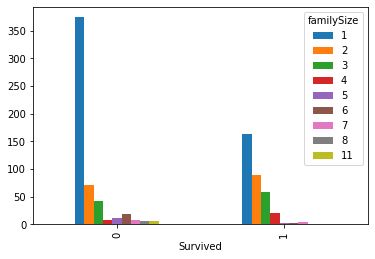

In [43]:
unstackSur_familySize['Survived'].plot.bar()

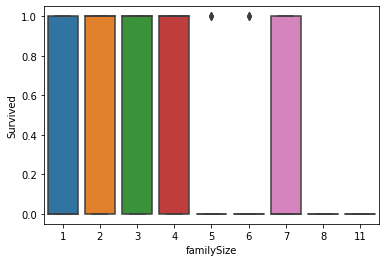

In [44]:
sns.boxplot(y='Survived', x='familySize', data = df)

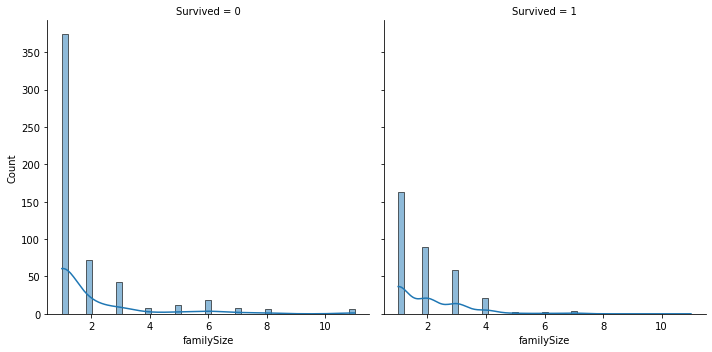

In [45]:
sns.displot(df, x="familySize", col="Survived", kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 70.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


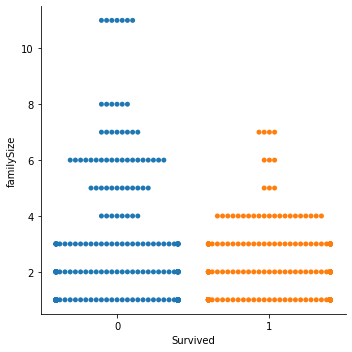

In [46]:
sns.catplot(x="Survived", y="familySize", kind="swarm",data=df)

In [47]:
Sur_Fare= df.groupby(['Survived', 'Fare'])[['Survived']].count()
unstackSur_Fare = Sur_Fare.unstack()
unstackSur_Fare

Survived                    ...                           
Fare     0.0000   4.0125   5.0000    ... 262.3750 263.0000 512.3292
Survived                             ...                           
0            14.0      1.0      1.0  ...      NaN      2.0      NaN
1             1.0      NaN      NaN  ...      2.0      2.0      3.0

[2 rows x 248 columns]

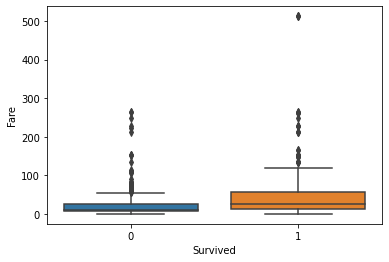

In [48]:
sns.boxplot(y='Fare', x='Survived', data = df)

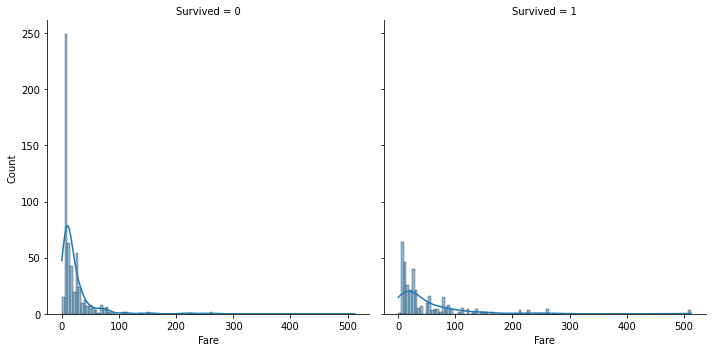

In [49]:
sns.displot(df, x="Fare", col="Survived", kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


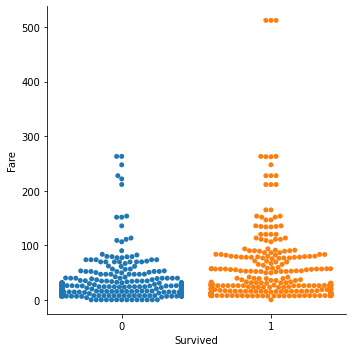

In [50]:
sns.catplot(x="Survived", y="Fare", kind="swarm",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


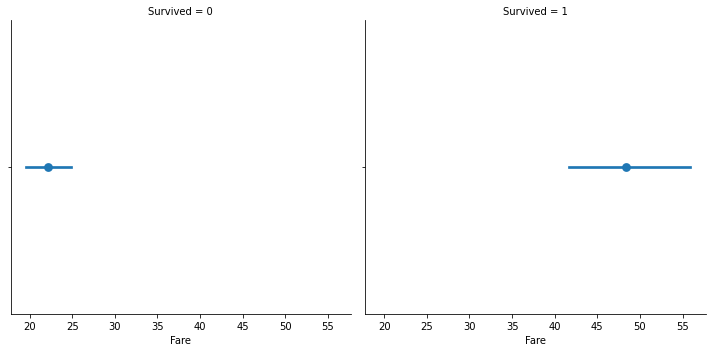

In [51]:
sns.factorplot(x='Fare', col='Survived', data=df)

In [ ]:
#cau 16

In [52]:
Sur_Pclass_Embarked= df.groupby(['Survived', 'Embarked','Pclass'])[['Survived']].count()
unstackSur_Pclass_Embarked = Sur_Pclass_Embarked.unstack()
unstackSur_Pclass_Embarked

Survived         
Pclass                   1   2    3
Survived Embarked                  
0        C              26   8   41
         Q               1   1   45
         S              53  88  286
1        C              59   9   25
         Q               1   2   27
         S              74  76   67

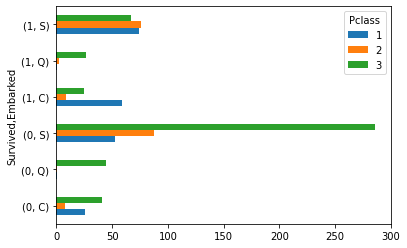

In [53]:
unstackSur_Pclass_Embarked['Survived'].plot.barh()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 93.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 73.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


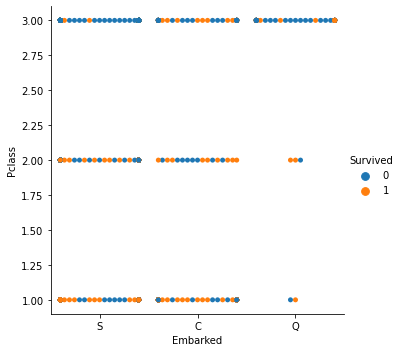

In [54]:
sns.catplot(x="Embarked", y="Pclass", hue='Survived', kind="swarm",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


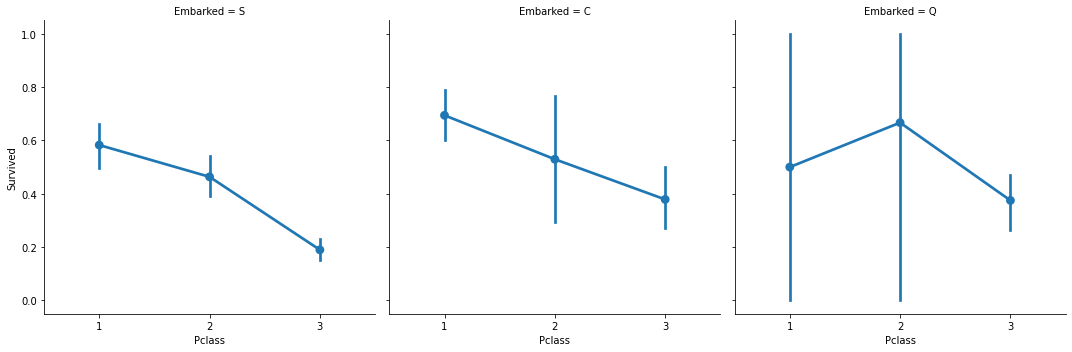

In [55]:
sns.factorplot(x='Pclass', y='Survived', col='Embarked', data=df)